Iteration 0: Best Fitness = 566.115840784119
Iteration 10: Best Fitness = 71.809456664564
Iteration 20: Best Fitness = 14.801413248616653
Iteration 30: Best Fitness = 6.4766015892023665
Iteration 40: Best Fitness = 4.8788847390912515
Iteration 50: Best Fitness = 4.728103418657596
Iteration 60: Best Fitness = 4.713420711080731
Iteration 70: Best Fitness = 4.712929118956101
Iteration 80: Best Fitness = 4.713242872647356
Iteration 90: Best Fitness = 4.7135557829043195

Final Best Fitness Found: 4.713710875585035
Best Solution Vector:
 [ 0.71642328  0.05307546  0.22725456  0.21243623 -0.57261284  0.6307403
  0.22188505 -0.05189338  0.4374206  -0.55034677  0.02865982  0.18153399
 -0.81732411  0.0495527  -0.52422473  0.35814036  0.01127253  0.5620862
 -0.30656393 -0.48789556 -0.16969919 -0.63350958 -0.21631493 -0.44037985
  0.35761799  0.11359734  0.11840005 -0.2772263   0.41187426  0.03754789]


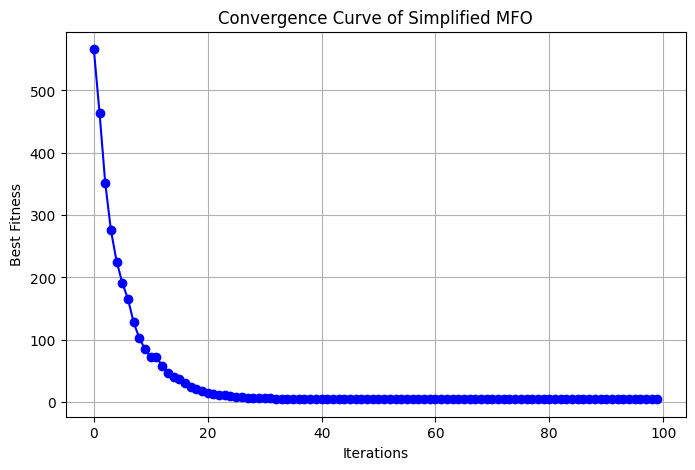

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- FIX RANDOM SEED FOR REPRODUCIBILITY ---
np.random.seed(42)

# --- PARAMETERS ---
population_size = 50    # Number of moths (candidate solutions)
dimension = 30          # Number of variables in the optimization problem
max_iterations = 100    # Maximum number of iterations
bounds = [-10, 10]      # Search space bounds for each variable
num_flames = 5          # Number of top flames to guide moths

# --- INITIALIZE POPULATION ---
# Create a random population of moths within the given bounds
moths = np.random.uniform(bounds[0], bounds[1], (population_size, dimension))

# --- FITNESS FUNCTION (Sphere Function) ---
# Calculates how good each solution is; the goal is to minimize this function
def fitness_function(x):
    return np.sum(x**2, axis=1)  # Sum of squares for each moth

# Evaluate initial fitness of the moths
fitness = fitness_function(moths)

# --- FUNCTION TO UPDATE FLAMES ---
# Flames represent the best solutions guiding the moths
def update_flames(moths, fitness, num_flames=num_flames):
    best_indices = np.argsort(fitness)[:num_flames]  # Select top moths
    return moths[best_indices]

# --- FUNCTION TO MOVE MOTHS TOWARD FLAMES (SPIRAL UPDATE) ---
# Simulates the natural spiral movement of moths toward flames
def spiral_update(moths, flames):
    new_moths = moths.copy()
    for i in range(len(moths)):
        # Select a random flame from the best solutions
        flame = flames[np.random.randint(len(flames))]
        # Move moth slightly towards the flame (10% of the distance)
        new_moths[i] = moths[i] + 0.1 * (flame - moths[i])
    return new_moths

# --- TRACK BEST FITNESS OVER ITERATIONS FOR DEMO ---
best_fitness_over_time = []

# --- MFO MAIN LOOP ---
for t in range(max_iterations):
    # Step 1: Identify the best solutions (flames)
    flames = update_flames(moths, fitness)

    # Step 2: Move moths toward flames using spiral movement
    moths = spiral_update(moths, flames)

    # Step 3: Recalculate fitness after movement
    fitness = fitness_function(moths)

    # Step 4: Save best fitness for plotting
    best_fitness_over_time.append(np.min(fitness))

    # Optional: print intermediate results for demo
    if t % 10 == 0:  # print every 10 iterations
        print(f"Iteration {t}: Best Fitness = {np.min(fitness)}")

# --- OUTPUT BEST SOLUTION FOUND ---
best_idx = np.argmin(fitness)
print("\nFinal Best Fitness Found:", fitness[best_idx])
print("Best Solution Vector:\n", moths[best_idx])

# --- PLOT CONVERGENCE CURVE ---
plt.figure(figsize=(8,5))
plt.plot(range(max_iterations), best_fitness_over_time, marker='o', color='blue')
plt.xlabel("Iterations")
plt.ylabel("Best Fitness")
plt.title("Convergence Curve of Simplified MFO")
plt.grid(True)
plt.show()
